In [199]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [200]:
df=pd.read_csv('eda.csv')

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  777715 non-null  int64  
 1   gender              777715 non-null  object 
 2   own_car             777715 non-null  object 
 3   own_property        777715 non-null  object 
 4   children            777715 non-null  int64  
 5   income              777715 non-null  float64
 6   income_type         777715 non-null  object 
 7   education           777715 non-null  object 
 8   family_status       777715 non-null  object 
 9   housing_type        777715 non-null  object 
 10  age_in_days         777715 non-null  int64  
 11  employment_in_days  777715 non-null  int64  
 12  mobile              777715 non-null  int64  
 13  work_phone          777715 non-null  int64  
 14  phone               777715 non-null  int64  
 15  email               777715 non-nul

In [202]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

In [203]:
df.duplicated().sum()

0

# Plotting Boxplot for numeric columns

<Figure size 1500x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'children')

<Axes: title={'center': 'children'}, ylabel='children'>

<Axes: >

Text(0.5, 1.0, 'income')

<Axes: title={'center': 'income'}, ylabel='income'>

<Axes: >

Text(0.5, 1.0, 'age_in_days')

<Axes: title={'center': 'age_in_days'}, ylabel='age_in_days'>

<Axes: >

Text(0.5, 1.0, 'family_members')

<Axes: title={'center': 'family_members'}, ylabel='family_members'>

<Axes: >

Text(0.5, 1.0, 'months_balance')

<Axes: title={'center': 'months_balance'}, ylabel='months_balance'>

<Axes: >

Text(0.5, 1.0, 'employment_in_days')

<Axes: title={'center': 'employment_in_days'}, ylabel='employment_in_days'>

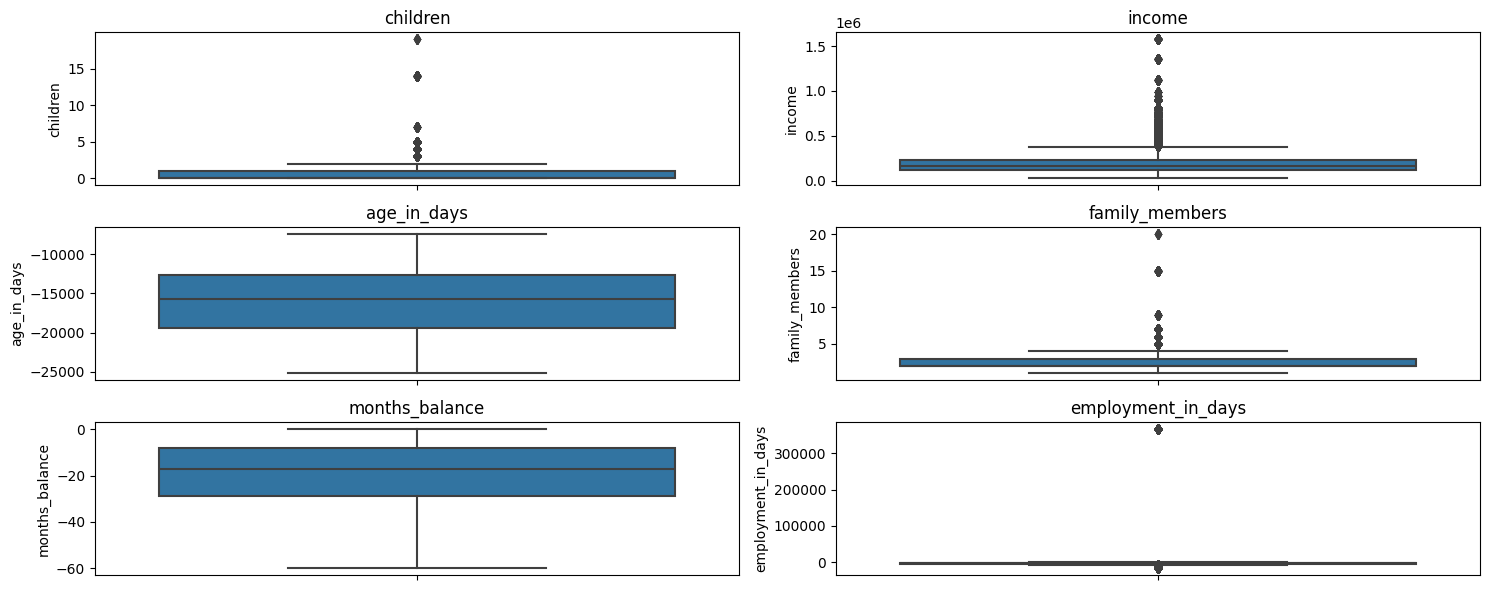

In [204]:

# filtering the list of specific columns    
col = ['children', 'income', 'age_in_days',  'family_members' ,'months_balance','employment_in_days']

# defining the figure size
plt.figure(figsize=(15, 6))

# plotting the countplot using for loop
for i in range(len(col)):
    plt.subplot(3, 2, i+1)
    plt.title(col[i])  # Use the column name as the title
    sns.boxplot(data=df, y=col[i])

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [205]:
#removing outliers
col=['children','income','family_members']
for i in range(len(col)):
    q1=df[col[i]].quantile(0.25)
    q3=df[col[i]].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col[i]]=np.where((df[col[i]]>=upper_bound)|(df[col[i]]<=lower_bound),df[col[i]].median(),df[col[i]])

# Plotting the boxplot to confirm outcomes

<Figure size 1500x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'children')

<Axes: title={'center': 'children'}, ylabel='children'>

<Axes: >

Text(0.5, 1.0, 'income')

<Axes: title={'center': 'income'}, ylabel='income'>

<Axes: >

Text(0.5, 1.0, 'age_in_days')

<Axes: title={'center': 'age_in_days'}, ylabel='age_in_days'>

<Axes: >

Text(0.5, 1.0, 'family_members')

<Axes: title={'center': 'family_members'}, ylabel='family_members'>

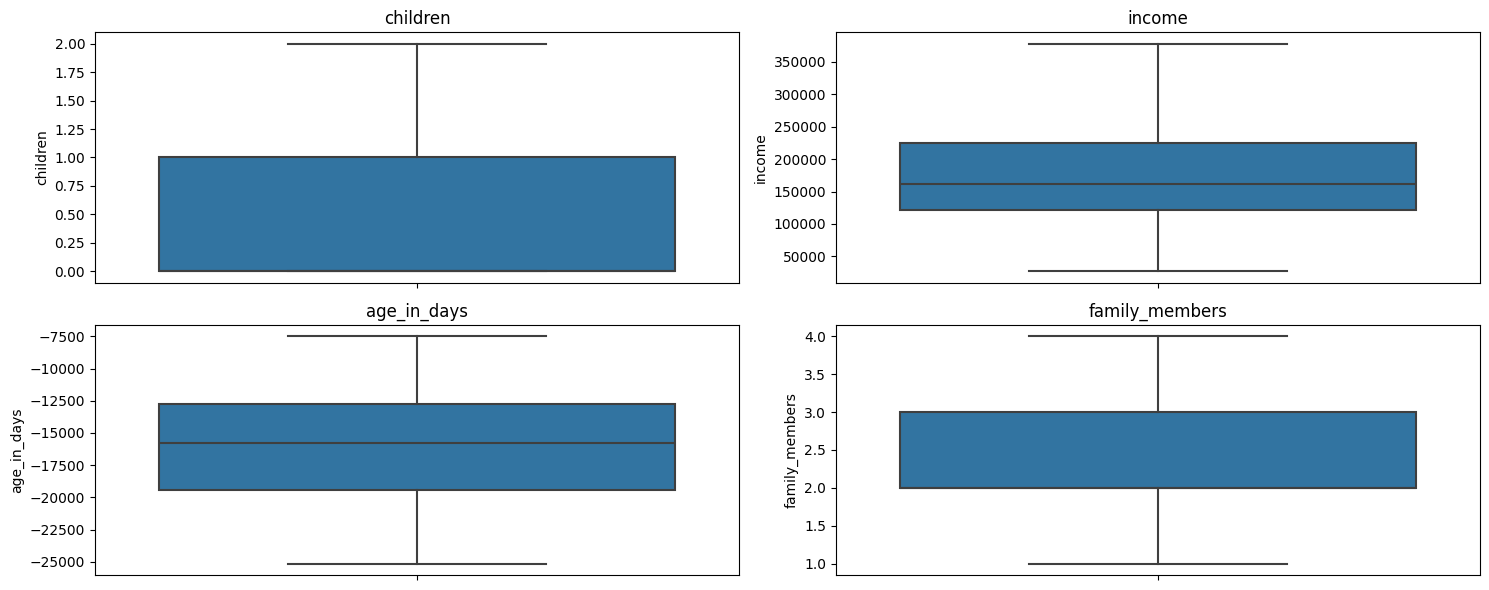

In [206]:
col = ['children', 'income', 'age_in_days',  'family_members']

plt.figure(figsize=(15, 6))

for i in range(len(col)):
    plt.subplot(2, 2, i+1)
    plt.title(col[i])  # Use the column name as the title
    sns.boxplot(data=df, y=col[i])

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

# Standardization

In [207]:
df

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C,good
1,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C,good
2,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C,good
3,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C,good
4,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0,first_month_due
777711,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,2,3rd_month_overdue
777712,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1,2nd_month_due
777713,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0,first_month_due


In [208]:
df['loan_status'].unique()

array(['good', '2nd_month_due', 'first_month_due', 'no_loan', 'bad_debt',
       '5th_month_overdue', '4th_month_overdue', '3rd_month_overdue'],
      dtype=object)

In [209]:
df['loan_status'] = df['loan_status'].map({'first_month_due': '0' , '2nd_month_due': '1', '3rd_month_overdue' : '2',  '4th_month_overdue': '3',
                                '5th_month_overdue' : '4', 'bad_debt' : '5' , 'good': '6' , 'no_loan' : '7'})


In [210]:
df['loan_status'].unique()

array(['6', '1', '0', '7', '5', '4', '3', '2'], dtype=object)

In [211]:
df

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C,6
1,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C,6
2,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C,6
3,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C,6
4,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0,0
777711,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,2,2
777712,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1,1
777713,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0,0


In [212]:
df["loan_status"] = df["loan_status"].map({'1':0,'2':0,'3':0,'4':0,'5':0,'0':1,'6':1,'7':1})

In [213]:
df.isna().sum()

ID                    0
gender                0
own_car               0
own_property          0
children              0
income                0
income_type           0
education             0
family_status         0
housing_type          0
age_in_days           0
employment_in_days    0
mobile                0
work_phone            0
phone                 0
email                 0
family_members        0
months_balance        0
status                0
loan_status           0
dtype: int64

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
df

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C,1
1,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C,1
2,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C,1
3,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C,1
4,5008804,M,Y,Y,0.0,162000.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0,1
777711,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,2,0
777712,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1,0
777713,5150337,M,N,Y,0.0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0,1


In [216]:
col=['children','income','age_in_days','family_members','ID']
sc=StandardScaler()
for i in col:
    df[i]=sc.fit_transform(df[[i]])

In [217]:
df.drop(columns="status",inplace=True)

# Label Encoding

In [218]:
from sklearn.preprocessing import LabelEncoder

In [219]:
col = ['gender', 'own_car', 'own_property', 'income_type','education', 'family_status', 'housing_type']
le = LabelEncoder()
for i in col:
    df[i] =le.fit_transform(df[i] )

In [220]:
df.sample(10)

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,loan_status
306783,-0.419285,0,1,1,-0.590317,-0.232385,2,4,2,1,0.519196,-4185,1,1,1,0,-0.199667,-9,1
597157,0.885865,1,0,1,-0.590317,1.367230,4,4,1,5,0.334024,-2871,1,1,0,0,-0.199667,-6,1
424920,0.248731,0,1,0,-0.590317,0.407461,0,4,0,5,0.462183,-5330,1,0,1,0,-0.199667,-13,1
636514,0.949830,0,0,0,0.958409,-1.384108,4,4,1,1,1.472830,-735,1,1,0,0,1.019232,-31,1
603209,0.893879,1,1,0,-0.590317,0.087538,4,4,3,5,1.215539,-3487,1,0,1,0,-1.418566,-20,1
480089,0.327455,0,0,1,-0.590317,-1.704032,4,1,1,1,0.574260,-747,1,0,0,0,-0.199667,-33,1
289578,-0.579699,0,0,1,-0.590317,0.983322,1,4,1,1,-1.602481,365243,1,0,0,0,-0.199667,-21,1
152132,0.006867,0,0,1,-0.590317,-0.552308,1,3,1,1,-1.570075,365243,1,0,0,0,-0.199667,-11,1
125824,-1.190304,0,0,1,-0.590317,0.279492,4,4,2,1,-0.715850,-2213,1,1,1,1,-1.418566,-31,1
593608,0.880507,0,0,1,-0.590317,-0.552308,4,4,1,1,0.757483,-2324,1,1,1,0,-0.199667,-34,1


# Check for Multicolinearity

In [221]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [222]:
col = df.drop(['loan_status'], axis=1)
factor  = pd.DataFrame(columns=["VIF", "Features"] )
factor["Features"] = col.columns
factor["VIF"] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
print(factor)

          VIF            Features
0    1.019165                  ID
1    1.240486              gender
2    1.218307             own_car
3    1.096036        own_property
4   12.236508            children
5    1.165436              income
6    1.187861         income_type
7    1.090580           education
8    4.476697       family_status
9    1.072517        housing_type
10   1.875586         age_in_days
11   1.872534  employment_in_days
12  26.842117              mobile
13   1.253519          work_phone
14   1.124165               phone
15   1.032459               email
16  17.299036      family_members
17   1.002499      months_balance


# Model Building

In [223]:
X=df.drop(['loan_status','children','family_members','mobile','ID'],axis=1)
y=df['loan_status']

In [224]:
X.head()

,gender,own_car,own_property,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,work_phone,phone,email,months_balance
0,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,0
1,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,-1
2,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,-2
3,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,-3
4,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,-4


In [225]:
col = X
factor  = pd.DataFrame(columns=["VIF", "Features"] )
factor["Features"] = col.columns
factor["VIF"] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
print(factor)

         VIF            Features
0   1.849160              gender
1   1.897481             own_car
2   2.708654        own_property
3   1.157115              income
4   3.125013         income_type
5   5.015382           education
6   2.821749       family_status
7   2.691962        housing_type
8   1.702441         age_in_days
9   2.089953  employment_in_days
10  1.582685          work_phone
11  1.572498               phone
12  1.120872               email
13  2.614558      months_balance


In [226]:
X.columns

Index(['gender', 'own_car', 'own_property', 'income', 'income_type',
       'education', 'family_status', 'housing_type', 'age_in_days',
       'employment_in_days', 'work_phone', 'phone', 'email', 'months_balance'],
      dtype='object')

In [227]:
X.shape

(777715, 14)

In [228]:
y.shape

(777715,)

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score , recall_score

In [232]:
def evaluate_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=5),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=10, random_state=42),
        "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators=50, random_state=42)
    }

    results = []

    # Evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        precision_test = precision_score(y_test, y_pred_test, average='macro')
        precision_train = precision_score(y_train, y_pred_train, average='macro')
        recall_test = recall_score(y_test, y_pred_test, average='macro')
        recall_train = recall_score(y_train, y_pred_train, average='macro')
        
        results.append({"Model": name, "Train Accuracy": accuracy_train, 'Test Accuracy': accuracy_test, 
                        "Train Precision": precision_train, 'Test Precision': precision_test, "Train Recall": recall_train,
                       'Test Recall': accuracy_test})

    return print(pd.DataFrame(results))

In [233]:
evaluate_classifiers(X_train, X_test, y_train, y_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.175204       0.175090         0.501247   
1  K-Nearest Neighbors        0.987370       0.984917         0.870811   
2        Decision Tree        0.991199       0.978495         0.862489   
3        Random Forest        0.990702       0.981549         0.893397   
4             AdaBoost        0.985068       0.985310         0.492534   

   Test Precision  Train Recall  Test Recall  
0        0.500898      0.511649     0.175090  
1        0.718383      0.614070     0.984917  
2        0.623274      0.823689     0.978495  
3        0.652170      0.753628     0.981549  
4        0.492655      0.500000     0.985310  


In [234]:
from sklearn.model_selection import RandomizedSearchCV

In [235]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def evaluate_classifiers(X_train, X_test, y_train, y_test, thresholds=None):
    if thresholds is None:
        thresholds = {"Logistic Regression": 0.2, "K-Nearest Neighbors": 0.2, 
                      "Decision Tree": 0.2, "Random Forest": 0.2, "AdaBoost": 0.2}
    
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42)
    }
    
    param_grids = {
        "Logistic Regression": {'max_iter': [100, 200, 300]},
        "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7, 9]},
        "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
        "Random Forest": {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
        "AdaBoost": {'n_estimators': [50, 100, 200]}
    }
    
    results = []
    
    for name, clf in classifiers.items():
        param_grid = param_grids[name]
        random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
        random_search.fit(X_train, y_train)
        
        best_clf = random_search.best_estimator_
        
        if hasattr(best_clf, "predict_proba"):
            y_pred_proba_test = best_clf.predict_proba(X_test)[:, 1]
            y_pred_proba_train = best_clf.predict_proba(X_train)[:, 1]
        elif hasattr(best_clf, "decision_function"):
            y_pred_proba_test = best_clf.decision_function(X_test)
            y_pred_proba_train = best_clf.decision_function(X_train)
        else:
            y_pred_proba_test = best_clf.predict(X_test)
            y_pred_proba_train = best_clf.predict(X_train)

        threshold = thresholds.get(name, 0.5)
        y_pred_test = (y_pred_proba_test >= threshold).astype(int)
        y_pred_train = (y_pred_proba_train >= threshold).astype(int)
        
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        precision_test = precision_score(y_test, y_pred_test, average='macro')
        precision_train = precision_score(y_train, y_pred_train, average='macro')
        recall_test = recall_score(y_test, y_pred_test, average='macro')
        recall_train = recall_score(y_train, y_pred_train, average='macro')
        roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
        roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
        
        results.append({
            "Model": name,
            "Best Parameters": random_search.best_params_,
            "Train Accuracy": accuracy_train,
            "Test Accuracy": accuracy_test,
            "Train Precision": precision_train,
            "Test Precision": precision_test,
            "Train Recall": recall_train,
            "Test Recall": recall_test,
            "Train ROC AUC": roc_auc_train,
            "Test ROC AUC": roc_auc_test
        })
    
    return pd.DataFrame(results)

# Example usage:
# Assuming X_train, X_test, y_train, y_test are already defined
thresholds = {"Logistic Regression": 0.6, "K-Nearest Neighbors": 0.4, "Decision Tree": 0.5, "Random Forest": 0.5, "AdaBoost": 0.7}
results_df = evaluate_classifiers(X_train, X_test, y_train, y_test, thresholds)
print(results_df)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterat

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model                                    Best Parameters  \
0  Logistic Regression                                  {'max_iter': 100}   
1  K-Nearest Neighbors                                 {'n_neighbors': 9}   
2        Decision Tree         {'min_samples_split': 10, 'max_depth': 10}   
3        Random Forest  {'n_estimators': 50, 'min_samples_split': 10, ...   
4             AdaBoost                               {'n_estimators': 50}   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.985068       0.985310         0.492534        0.492655   
1        0.985890       0.985496         0.912688        0.791592   
2        0.985755       0.985631         0.875301        0.805548   
3        0.987825       0.985438         0.901518        0.751238   
4        0.014932       0.014690         0.007466        0.007345   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  
0      0.500000     0.500000       0.501619      0.502204  
1 